In [27]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_base_test_remove_b.nc")
ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/BBL_w_adj_test_short_full.nc") #i=103

In [29]:
ocean_data

<xarray.Dataset>
Dimensions:  (zC: 100, zF: 101, xC: 500, yF: 1, xF: 500, yC: 1, time: 2)
Coordinates:
  * zC       (zC) float64 1.0 3.0 5.0 7.0 9.0 ... 191.0 193.0 195.0 197.0 199.0
  * zF       (zF) float64 0.0 2.0 4.0 6.0 8.0 ... 192.0 194.0 196.0 198.0 200.0
  * xC       (xC) float64 2.0 6.0 10.0 14.0 ... 1.99e+03 1.994e+03 1.998e+03
  * yF       (yF) float64 1.0
  * xF       (xF) float64 0.0 4.0 8.0 12.0 ... 1.988e+03 1.992e+03 1.996e+03
  * yC       (yC) float64 1.0
  * time     (time) timedelta64[ns] 00:00:00 01:44:43.194877030
Data variables:
    v        (time, zC, yF, xC) float64 ...
    B        (time, zC, yC, xC) float64 ...
    U        (time, zC, yC, xF) float64 ...
    w        (time, zF, yC, xC) float64 ...
    V        (time, zC, yF, xC) float64 ...
    b        (time, zC, yC, xC) float64 ...
    u        (time, zC, yC, xF) float64 ...
Attributes:
    interval:              6283.194877030214
    Oceananigans:          This file was generated using Oceananigans v0.90.8
    Julia:                 This file was generated using Julia Version 1.9.2\...
    output time interval:  Output was saved every 1.745 hours.
    date:                  This file was generated on 2024-04-05T08:25:43.298.
    schedule:              TimeInterval

In [30]:
u = ocean_data.u#+ocean_data.U
v = ocean_data.v+ocean_data.V
b = ocean_data.b + ocean_data.B
# B = ocean_data.B
w = ocean_data.w

In [31]:
f = 2*(7.292115e-5)*np.sin(np.pi/4)
v.time[103]*(f/(2*np.pi))

IndexError: index 103 is out of bounds for axis 0 with size 2

In [ ]:
# ocean_data.E

In [ ]:
# vmin and vmax control colorbar range
# for i in range(len(ocean_data.time)):
# show timw -20, -25, -30, -35
q = -2
v[q].plot()
# xr.plot.contour(b[q,:,:,0],levels=20,cmap="gray")
# # plt.title("Small Pertubations w/0 Background")
# plt.show()

In [ ]:
b[0,:,0,:]

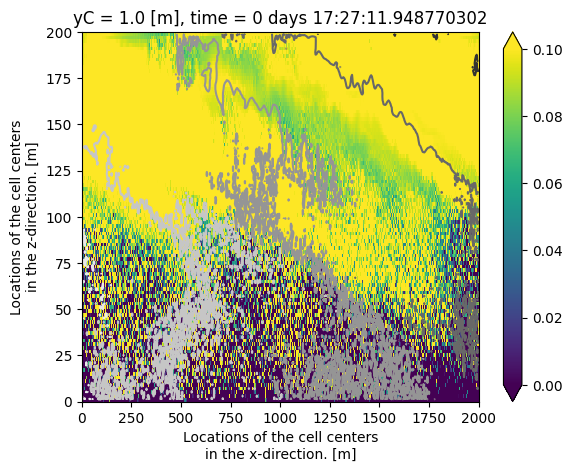

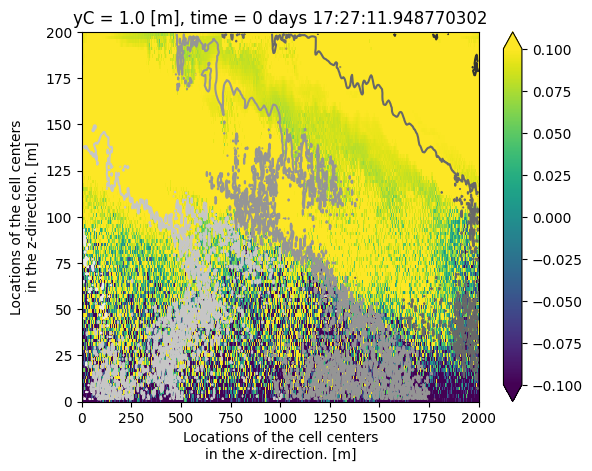

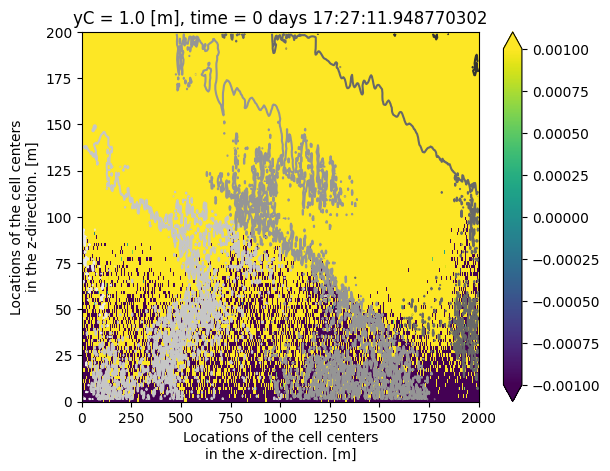

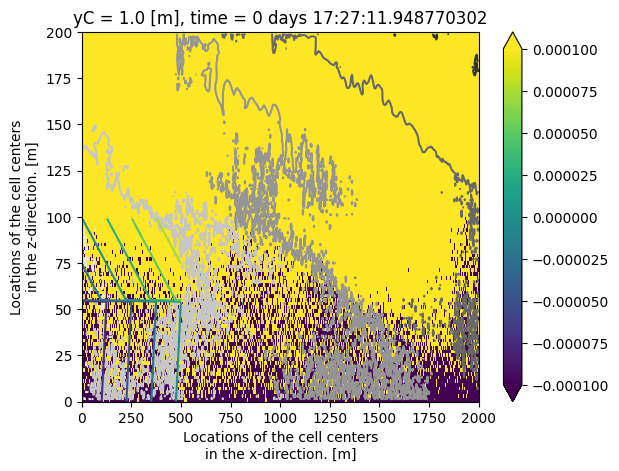

In [32]:
# plt.contour(b[0])
plt.contour(b[0,:,0,:])
plt.show()

In [33]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, axs = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    v[t].plot(add_colorbar=True,vmin=-0.0001,vmax=0.0001)
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="Greys")

matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
# plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    v[t].plot(add_colorbar=True,vmin=-0.001,vmax=0.001)
    # plt.contour(b[t,:,0,:],cmap="Greys")
    b[t,:,0,:].plot.contour(cmap="Greys")

anim = matplotlib.animation.FuncAnimation(fig, animate, frames=frms)
# writervideo = matplotlib.animation.FFMpegWriter(fps=60) 
anim.save('jump_instability_p_a.gif') 
plt.close()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

frms = len(v.time)
def animate(t):
    plt.clf()
    cf = v[t].plot(add_colorbar=True)

matplotlib.animation.FuncAnimation(fig, animate, frames=frms)

b[1].plot()